<a href="https://colab.research.google.com/github/himanshu530/Image_Captioning_Bot/blob/main/Image_caption_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Automatic surveillance for cctv cameras
# Visual Aid for blind (Image ->text->Speech)
# google search for images

## **Preparing the data**

Dataset link : [Flickr 8K dataset](https://www.kaggle.com/adityajn105/flickr8k/activity)

Author : @himanshu530

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
def readTextFile(path):
  with open(path) as f:
    captions = f.read()

  return captions


In [ ]:
captions = readTextFile("/content/drive/MyDrive/ARM Codes/captions.txt")


In [ ]:
print(len(captions))

3319294


In [ ]:
captions = captions.split("\n")
print(len(captions))

40457


In [ ]:
captions[2]

'1000268201_693b08cb0e.jpg,A girl going into a wooden building .'

In [ ]:
captions[0],captions[-1]

('image,caption', '')

In [ ]:
captions.pop(0)
captions.pop(-1)

''

In [ ]:
captions[0],captions[-1]

('1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '997722733_0cb5439472.jpg,A rock climber practices on a rock climbing wall .')

In [ ]:
# Creating a dictionary to map images to its captions

descriptions = {}

for x in captions:
  first,second = x.split(',',1)
  img_name = first.split('.')[0]

  if descriptions.get(img_name) is None:
    descriptions[img_name] = ()
  
  l = list(descriptions[img_name])
  l.append(second)
  descriptions[img_name] = l



In [ ]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [55]:
IMG_PATH = "/content/drive/MyDrive/Images/"

import cv2
import matplotlib.pyplot as plt


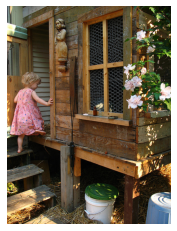

In [ ]:
img = cv2.imread(IMG_PATH+"1000268201_693b08cb0e.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

### Data Cleaning


*   No stemming as we have to generate english sentences
*   Convert to lower case
*   Remove Numbers
*   Remove punctuations
*   Reduce vocab size



In [ ]:
import re

In [ ]:
def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()

  sentence = [s for s in sentence if len(s)>1]
  sentence = " ".join(sentence)
  return sentence


In [ ]:
 clean_text("A cat is sitting over the house number #64")

'cat is sitting over the house number'

In [ ]:
# cleaning all the captions

for key,caption_list in descriptions.items():
  for i in range(len(caption_list)):
    caption_list[i] = clean_text(caption_list[i])


In [ ]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [ ]:
# writing the data to a text file
f = open("descriptions.txt","w")
f.write(str(descriptions))
f.close()  

#It stores the dictionary in the form of a string

## Creating vocab 
Vocab is a set of all the unique words which model can predict and use

In [3]:
# To read the file as dictionary execute this cell

descriptions = None
import json
with open("descriptions.txt") as f:
  descriptions = f.read()


json_acceptable_string = descriptions.replace("'","\"") 
descriptions = json.loads(json_acceptable_string)


In [4]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [5]:
# Vocab

vocab = set() # To store unique words

for key in descriptions.keys():
  [vocab.update(sentence.split()) for sentence in descriptions[key]]
 
print(len(vocab))  # vocab size

8424


In [6]:
 # total number of words in all sentences

 total_words = []

 for key in descriptions.keys():
   [total_words.append(i) for des in descriptions[key] for i in des.split()]

print(len(total_words))
    

373803


In [7]:
# filter words from vocab according to certain threshhold frequency
import collections

counter = collections.Counter(total_words)
freq_count = dict(counter)
print(freq_count)

{'child': 1545, 'in': 18986, 'pink': 739, 'dress': 348, 'is': 9345, 'climbing': 507, 'up': 1302, 'set': 109, 'of': 6723, 'stairs': 109, 'an': 2432, 'entry': 1, 'way': 53, 'girl': 3328, 'going': 149, 'into': 1074, 'wooden': 284, 'building': 510, 'little': 1768, 'playhouse': 6, 'the': 18419, 'to': 3176, 'her': 1178, 'cabin': 4, 'black': 3848, 'dog': 8138, 'and': 8862, 'spotted': 38, 'are': 3504, 'fighting': 133, 'tri': 14, 'colored': 221, 'playing': 2008, 'with': 7765, 'each': 430, 'other': 773, 'on': 10745, 'road': 398, 'white': 3959, 'brown': 2578, 'spots': 29, 'staring': 57, 'at': 2915, 'street': 944, 'two': 5642, 'dogs': 2125, 'different': 46, 'breeds': 5, 'looking': 743, 'pavement': 48, 'moving': 41, 'toward': 146, 'covered': 372, 'paint': 62, 'sits': 577, 'front': 1386, 'painted': 64, 'rainbow': 22, 'hands': 246, 'bowl': 30, 'sitting': 1368, 'large': 1236, 'small': 1278, 'grass': 1622, 'plays': 526, 'fingerpaints': 3, 'canvas': 6, 'it': 401, 'there': 304, 'pigtails': 14, 'painting'

In [8]:
# sort this dictionary according to frequency count

threshold =10

sorted_freq_cnt = sorted(freq_count.items(),reverse=True,key=lambda x:x[1])
sorted_freq_cnt = [x for x in sorted_freq_cnt if x[1]>threshold]

total_words = [x[0] for x in sorted_freq_cnt]



In [ ]:
sorted_freq_cnt

[('in', 18986),
 ('the', 18419),
 ('on', 10745),
 ('is', 9345),
 ('and', 8862),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7274),
 ('of', 6723),
 ('two', 5642),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3504),
 ('woman', 3402),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2915),
 ('people', 2883),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('through', 2032),
 ('playing', 2008),
 ('while', 1968),
 ('shirt', 1962),
 ('down', 1843),
 ('standing', 1787),
 ('ball', 1783),
 ('little', 1768),
 ('grass', 1622),
 ('snow', 1547),
 ('child', 1545),
 ('person', 1542),
 ('jumping', 1473),
 ('over', 1415),
 ('three', 1387),
 ('front', 1386),
 ('sitting', 1368),
 ('holding', 1324),
 ('up', 1302),
 ('field', 1283),
 ('small', 1278),
 ('by', 1249),
 ('large', 1236),
 ('green', 1234),
 ('one', 1222),
 ('group', 1218),
 ('yellow', 1217),
 ('her', 1178),
 ('walk

In [ ]:
total_words

In [9]:
print(len(total_words))  # final vocab size

1845


## Prepare Test and Train data

In [17]:
train_file_data = readTextFile("/content/drive/MyDrive/ARM Codes/Flickr_8k.trainImages.txt")

test_file_data = readTextFile("/content/drive/MyDrive/ARM Codes/Flickr_8k.testImages.txt")

In [ ]:
print(train_file_data)

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
3535879138_9281d

In [18]:
train = [row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
print(train)

['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87', '218342358_1755a9cce1', '2501968935_02f2cd8079', '2699342860_5288e203ea', '2638369467_8fc251595b', '2926786902_815a99a154', '2851304910_b5721199bc', '3423802527_94bd2b23b0', '3356369156_074750c6cc', '2294598473_40637b5c04', '1191338263_a4fa073154', '2380765956_6313d8cae3', '3197891333_b1b0fd1702', '3119887967_271a097464', '2276499757_b44dc6f8ce', '2506892928_7e79bec613', '2187222896_c206d63396', '2826769554_85c90864c9', '3097196395_ec06075389', '3603116579_4a28a932e2', '3339263085_6db9fd0981', '2532262109_87429a2cae', '2076906555_c20dc082db', '2502007071_82a8c639cf', '3113769557_9edbb8275c', '3325974730_3ee192e4ff', '1655781989_b15ab4cbff', '1662261486_db967930de', '2410562803_56ec09f41c', '2469498117_b4543e1460', '69710415_5c2bfb1058', '3414734842_beb543f400', '3006217970_90b42e6b27', '2192411521_9c7e488c5e', '3535879138_9281dc83d5', '2685788323_ceab14534a', '34

In [19]:
test = [row.split(".")[0] for row in test_file_data.split("\n")[:-1]]
print(test[:10])

['3385593926_d3e9c21170', '2677656448_6b7e7702af', '311146855_0b65fdb169', '1258913059_07c613f7ff', '241347760_d44c8d3a01', '2654514044_a70a6e2c21', '2339106348_2df90aa6a9', '256085101_2c2617c5d0', '280706862_14c30d734a', '3072172967_630e9c69d0']


In [20]:
# Prepare the descriptions for the training data

# add start and end token to 

train_descriptions = {}

for img_id in train:
  train_descriptions[img_id] = []
  for cap in descriptions[img_id]:
    cap_to_append = "startseq " + cap + " endseq"
    train_descriptions[img_id].append(cap_to_append)



In [21]:
train_descriptions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

## Transfer Learning

* Images---> features
* Text---> features

In [1]:
# Image feature extraction  Using Resnet50 pretrained model



import string
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from keras.preprocessing import image

from keras.models import Model,load_model

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.layers import Input,Dense,Dropout,Embedding,LSTM
from keras.layers.merge import add


In [ ]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:

model_new = Model(model.input,model.layers[-2].output)

In [ ]:
# Extracting features for all the images and saving in a file
import numpy as np
def preprocess_img(img):
  img = image.load_img(img,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)

  # Normalisation

  img = preprocess_input(img)

  return img





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


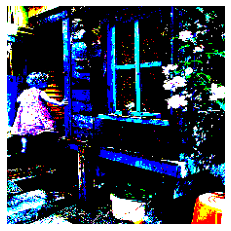

[[[[ -30.939003   -61.779      -67.68     ]
   [  13.060997     6.2210007  -17.68     ]
   [  34.060997    32.221        5.3199997]
   ...
   [ -99.939     -116.779     -118.68     ]
   [ -98.939     -111.779     -118.68     ]
   [-101.939     -108.779     -120.68     ]]

  [[ -36.939003   -68.779      -72.68     ]
   [  21.060997     9.221001   -13.68     ]
   [  38.060997    37.221        8.32     ]
   ...
   [ -94.939     -104.779     -113.68     ]
   [ -93.939     -108.779     -116.68     ]
   [ -90.939      -86.779     -102.68     ]]

  [[ -39.939003   -74.779      -76.68     ]
   [  26.060997    13.221001    -9.68     ]
   [  41.060997    36.221        6.3199997]
   ...
   [ -99.939     -107.779     -115.68     ]
   [-101.939     -107.779     -121.68     ]
   [ -95.939     -101.779     -123.68     ]]

  ...

  [[ -27.939003    56.221      107.32     ]
   [ -92.939      -49.779       20.32     ]
   [ -49.939003   -13.778999    35.32     ]
   ...
   [ 150.061      132.22101    126.

In [ ]:
img = preprocess_img(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.axis("off")
plt.show()

print(img)

In [ ]:
 def encode_image(img):
   img = preprocess_img(img)
   feature_vector = model_new.predict(img)
   feature_vector = feature_vector.reshape((2048,))
   return feature_vector

In [ ]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

(2048,)


array([0.06535947, 0.16782546, 0.32517573, ..., 0.05107125, 0.32821143,
       1.004337  ], dtype=float32)

In [ ]:
# All images to feature vector
start = time()
encoding_train = {}  # image_id mapped to feature vector

for ix,img_id in enumerate(train):
  img_path = IMG_PATH+img_id+".jpg"
  encoding_train[img_id] = encode_image(img_path)

  if ix%100==0:
    print("Encoding in Progress Time Step : %d"%ix)


end_t = time()

print("Total time taken",end_t-start)



In [ ]:
# store everything to the disk
with open("encoded_train_features.pkl","wb") as f:
  pickle.dump(encoding_train,f)




In [ ]:
start = time()
encoding_test = {}  # image_id mapped to feature vector

for ix,img_id in enumerate(test):
  img_path = IMG_PATH+img_id+".jpg"
  encoding_test[img_id] = encode_image(img_path)

  if ix%100==0:
    print("Test Encoding in Progress Time Step : %d"%ix)


end_t = time()

print("Total time taken",end_t-start)


Test Encoding in Progress Time Step : 0
Test Encoding in Progress Time Step : 100
Test Encoding in Progress Time Step : 200
Test Encoding in Progress Time Step : 300
Test Encoding in Progress Time Step : 400
Test Encoding in Progress Time Step : 500
Test Encoding in Progress Time Step : 600
Test Encoding in Progress Time Step : 700
Test Encoding in Progress Time Step : 800
Test Encoding in Progress Time Step : 900
Total time taken 248.3082582950592


In [ ]:
# store everything to the disk
with open("encoded_test_features.pkl","wb") as f:
  pickle.dump(encoding_test,f)

In [10]:
# Data preprocessing for captions

#Map every word with index (to feed into model). Models only work on numerical data

word2idx = {}
idx2word = {}

for i,word in enumerate(total_words):
  word2idx[word] = i+1
  idx2word[i+1] = word




In [13]:
word2idx["dog"]
idx2word[6]    # This is how it works

'dog'

In [14]:
# Add startseq and endseq to the vocabulary

idx2word[1846] = 'startseq'
word2idx['startseq'] = 1846

idx2word[1847] = 'endseq'
word2idx['endseq'] = 1847

vocab_size = len(word2idx)+1
print(vocab_size)   # final vocabulary



1848


In [23]:
max_len = 0

for key in train_descriptions.keys():
  for cap in train_descriptions[key]:     
    max_len = max(max_len,len(cap.split()))

print(max_len)  # this will be the batch size

35


In [26]:
f = open("encoded_train_features.pkl","rb")

encoding_train = pickle.load(f)



## Data generator

In [28]:
def data_generator(train_descriptions,encoding_train,word2idx,max_len,batch_size):
  X1,X2, y = [],[],[]
  n=0

  while True:
    for key,desc_list in train_descriptions.items():
      n = n+1
      photo = encoding_train[key+".jpg"]
      for desc in desc_list:
        seq = [word2idx[word] for word in desc.split() if word in word2idx]
        for i in range(1,len(seq)):
          xi = seq[0:i]
          yi = seq[i]
          
          xi = pad_sequences([xi],max_len,value=0,padding='post')[0]
          yi = to_categorical([yi],num_classes=vocab_size)[0]

          X1.append(photo)
          X2.append(xi)
          y.append(yi)

        if n==batch_size:
          yield [[np.array(X1),np.array(X2)],np.array(y)]

          X1,X2,y = [],[],[]
          n=0
 


In [29]:
f1 = open("/content/drive/MyDrive/ARM Codes/glove.6B.50d.txt",encoding='utf8')

In [35]:
embedding_index = {}
import numpy as np
for line in f1:
  values = line.split()
  word = values[0]

  embedding_word = np.array(values[1:],dtype='float')
  embedding_index[word] = embedding_word

In [36]:
embedding_index['apple'] #embedding for the word apple

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [37]:
f1.close()

## Word Embedding

In [39]:

def get_embedding_matrix():
  emb_dim = 50
  matrix = np.zeros((vocab_size,emb_dim))

  for word,idx in word2idx.items():
    embedding_vector = embedding_index.get(word)

    if embedding_vector is not None:
      matrix[idx] = embedding_vector

  return matrix
  

In [40]:
embedding_matrix = get_embedding_matrix()
print(embedding_matrix.shape)  # vocab_size*glove vector dim

(1848, 50)


## Model architecture

In [41]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)

inp_img2 = Dense(256,activation='relu')(inp_img1)


In [42]:
input_captions = Input(shape=(max_len,))

inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)

inp_cap2 = Dropout(0.3)(inp_cap1)

inp_cap3 = LSTM(256)(inp_cap2)



In [44]:
decoder1 = add([inp_img2,inp_cap3]) # This captures the entire sentence generated till now

decoder2 = Dense(256,activation='relu')(decoder1)

outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined model

model = Model(inputs = [input_img_features,input_captions],outputs=outputs)




In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 50)       92400       input_2[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_1[0][0]                    
______________________________________________________________________________________________

In [46]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [47]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [48]:
# Model Training

In [49]:
epochs = 20
batch_size = 3
steps = len(train_descriptions)//number_pics_per_batch

In [50]:
def train():
  for i in range(epochs):
    generator = data_generator(train_descriptions,encoding_train,word2idx,max_len,batch_size)

    model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    model.save('./model_weights/model_'+str(i)+'.h5')


In [51]:
model_f = load_model('model_9.h5')

In [59]:
def predict_captions(photo):
  in_text = "startseq"

  for i in range(max_len):
    sequence = [word2idx[w] for w in in_text.split() if w in word2idx]
    sequence = pad_sequences([sequence],maxlen=max_len,padding='post')

    ypred = model_f.predict([photo,sequence])
    ypred = ypred.argmax() # index of word with max probability

    word = idx2word[ypred]
    
    in_text += (' '+word)

    if word == 'endseq':
      break

  final_caption = in_text.split()[1:-1]
  final_caption = ' '.join(final_caption)

  return final_caption

In [53]:
f2 = open("encoded_test_features.pkl","rb")

encoding_test = pickle.load(f2)



man in hat and white shirt is standing on top of mountain


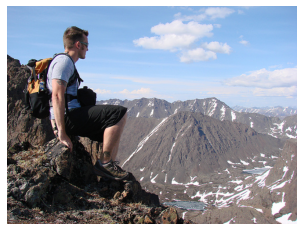

two people are standing on snowy mountain


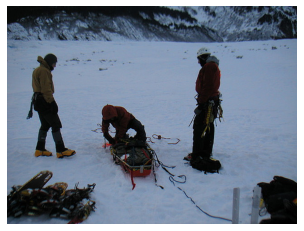

boy in white shirt and blue shorts is playing soccer


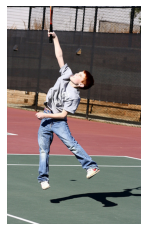

woman in pink shirt and brown shirt is holding child hand in hand hand


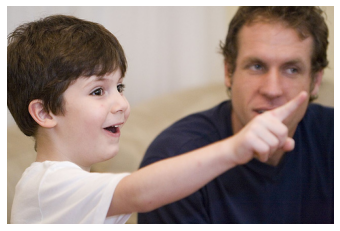

man in green shirt is doing tricks on bicycle


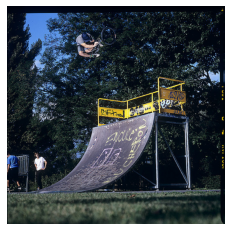

woman in sunglasses and scarf is looking at the camera


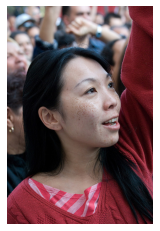

two dogs are running in field


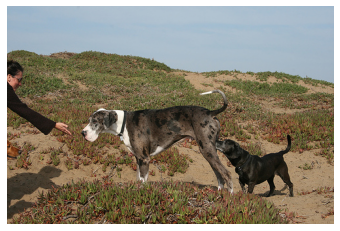

man in black shirt and black shirt is sitting on rock overlooking the water


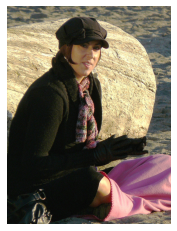

man in black shirt and jeans skateboards on skateboard


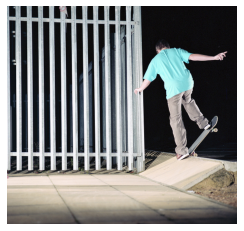

black and white dog is running on the grass


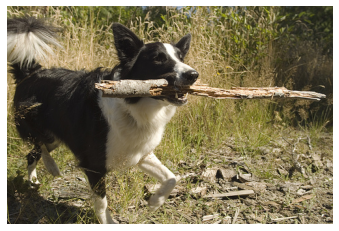

girl in white shirt and cast pants is standing on the sidewalk


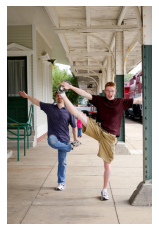

german shepherd jumps in the air


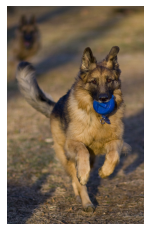

man in black shirt and black shirt is sitting on rock overlooking the water


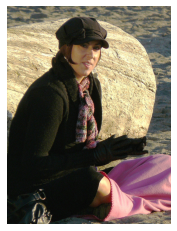

group of people are standing in front of building


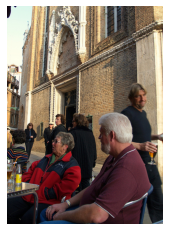

two men in field hockey game


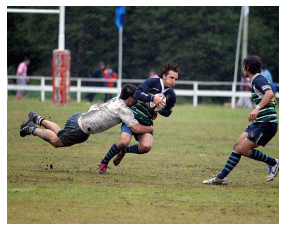

In [60]:
# Pick some random images

for i in range(15):
  no = np.random.randint(0,1000)
  all_image_names = list(encoding_test.keys())
  img_name = all_image_names[no]

  photo_2048 = encoding_test[img_name].reshape((1,2048))

  i = plt.imread(IMG_PATH+img_name+".jpg")
  caption = predict_captions(photo_2048)
  print(caption)
  plt.imshow(i)
  plt.axis("off")
  plt.show()






